# Physics-Based Deep Learning

 Physics-Based Deep Learning (PBDL) is an interdisciplinary field that synergizes physical modeling with deep learning techniques to enhance the accuracy and efficiency of simulations and predictions in engineering and scientific research. By embedding physical laws into machine learning models, PBDL addresses the limitations of purely data-driven approaches, leading to models that are both data-efficient and physically consistent.

Traditional machine learning models excel in pattern recognition and predictive tasks when ample data is available. However, in many engineering applications, data may be scarce, noisy, or expensive to obtain. Moreover, purely data-driven models often fail to generalize beyond the training data, especially when they lack an understanding of the underlying physical principles governing the system. PBDL mitigates these challenges by integrating known physical laws, typically expressed as partial differential equations (PDEs), into the learning process.

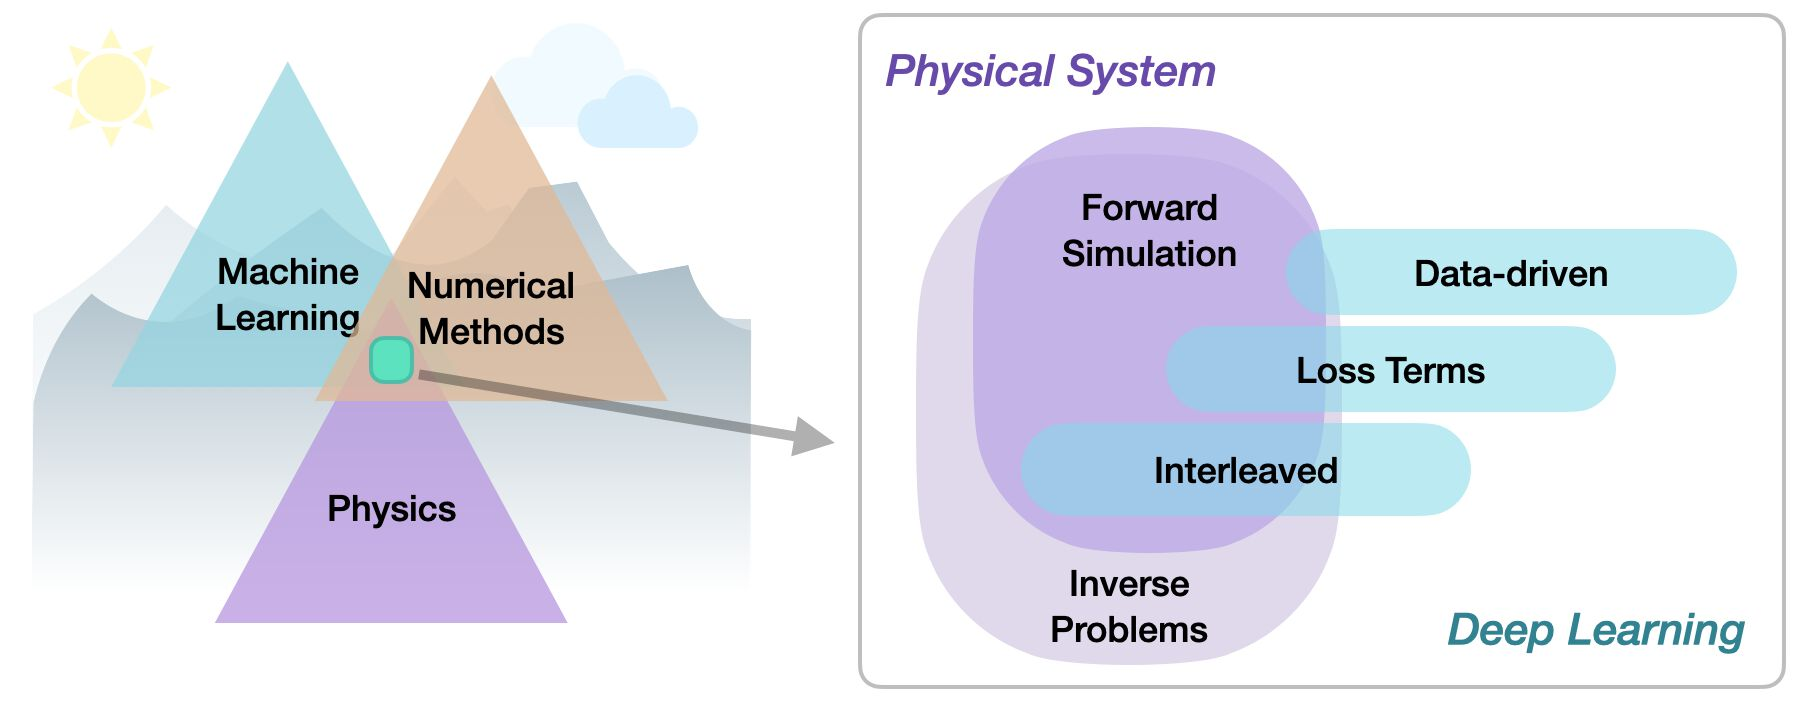

## Categories of Physics-Based Deep Learning Approaches

PBDL methodologies can be broadly categorized based on the degree of integration between physical models and learning algorithms:

1. **Data-Driven Methods:** These approaches rely solely on data generated by physical systems, either real or simulated, without explicitly incorporating physical laws into the learning process. While straightforward, they may struggle with generalization and require large datasets.

2. **Physics-Informed Loss Functions:** In this approach, physical laws are embedded into the loss function of the neural network. By computing the residuals of the governing differential equations and including them in the loss function, the network learns solutions that are consistent with known physics. This method is exemplified by Physics-Informed Neural Networks (PINNs), which have been applied to solve forward and inverse problems involving nonlinear PDEs. 

3. **Interleaved Methods:** These involve a tight integration between neural networks and physical simulations, often requiring differentiable simulators. This close coupling allows for accurate modeling of temporal evolutions and dynamic systems. For instance, differentiable physics engines enable the seamless integration of physical simulations into the learning process, facilitating the training of models that can predict future behavior of dynamic systems. 


## Mathematical Formulation

Consider a physical system governed by a PDE:

$$ \mathcal{F}(u(\mathbf{x}, t)) = 0 $$

where $ u(\mathbf{x}, t) $ represents the state variable (e.g., temperature, pressure) at spatial location $ \mathbf{x} $ and time $ t $, and $ \mathcal{F} $ denotes the differential operator.

In a physics-informed neural network, we approximate $ u(\mathbf{x}, t) $ using a neural network $ u_{\text{NN}}(\mathbf{x}, t; \theta) $ with parameters $ \theta $. The loss function $ \mathcal{L} $ combines data-driven and physics-based components:

$$ \mathcal{L} = \mathcal{L}_{\text{data}} + \lambda \mathcal{L}_{\text{physics}} $$

where:

- $ \mathcal{L}_{\text{data}} = \frac{1}{N} \sum_{i=1}^{N} \left| u_{\text{NN}}(\mathbf{x}_i, t_i; \theta) - u_{\text{true}}(\mathbf{x}_i, t_i) \right|^2 $ represents the mean squared error between the network's predictions and available data at $ N $ sampled points.

- $ \mathcal{L}_{\text{physics}} = \frac{1}{M} \sum_{j=1}^{M} \left| \mathcal{F}(u_{\text{NN}}(\mathbf{x}_j, t_j; \theta)) \right|^2 $ enforces the PDE constraints at $ M $ collocation points.

- $ \lambda $ is a hyperparameter that balances the influence of data and physics constraints.

By minimizing $ \mathcal{L} $, the neural network learns to produce outputs that not only fit the observed data but also satisfy the governing physical laws.



## Learning to model experimental data

Let’s look at one way machine learning can be used for scientific research. Imagine we are given some experimental data points that come from some unknown physical phenomenon, e.g. the orange points in the animation below.

A common scientific task is to find a model which is able to accurately predict new experimental measurements given this data.

![image.png](images/Lesson_09_nn.gif)

One popular way of doing this using machine learning is to use a neural network. Given the location of a data point as input (denoted x), a neural network can be used to output a prediction of its value (denoted u), as shown in the figure below:

![image.png](images/Lesson_09_nn-768x420.png)

To learn a model, we try to tune the network’s free parameters (denoted by the $\theta$ in the figure above) so that the network’s predictions closely match the available experimental data. This is usually done by minimising the mean-squared-error between its predictions and the training points;

$$\mathrm{min} \frac{1}{N} \sum^{N}_{i} (u_{\mathrm{NN}}(x_{i};\theta) - u_{\mathrm{true}}(x_i) )^2$$

The result of training such a neural network using the experimental data above is shown in the animation.

### The “naivety” of purely data-driven approaches
The problem is, using a purely data-driven approach like this can have significant downsides. Have a look at the actual values of the unknown physical process used to generate the experimental data in the animation above (grey line).

You can see that whilst the neural network accurately models the physical process within the vicinity of the experimental data, it fails to generalise away from this training data. By only relying on the data, one could argue it hasn’t truly “understood” the scientific problem.

So researchers are now looking for ways to include prior scientific knowledge into our machine learning workflows, in the blossoming field of scientific machine learning (SciML).

## Physics-informed neural networks

The idea is very simple: add the known differential equations directly into the loss function when training the neural network.

This is done by sampling a set of input training locations ($\{x_{j}\}$) and passing them through the network. Next gradients of the network’s output with respect to its input are computed at these locations (which are typically analytically available for most neural networks, and can be easily computed using autodifferentiation). Finally, the residual of the underlying differential equation is computed using these gradients, and added as an extra term in the loss function.


  


![pinn](images/Lesson_09_pinn-768x304.png)

The problem above is a classic physics problem, and we know that the underlying physics can be described by the following differential equation:

  $$m\frac{d^2u}{dx^2} + \mu \frac{du}{dx} + k u = 0$$

This amounts to using the following loss function to train the network:

$$
  \mathrm{min}\frac{1}{N} \sum^{N}_{i} (u_{\mathrm{NN}}(x_{i};\theta) - u_{\mathrm{true}}(x_i) )^2 \\+\frac{1}{M} \sum^{M}_{j} \left( \left[ m\frac{d^2}{dx^2} + \mu \frac{d}{dx} + k \right] u_{\mathrm{NN}}(x_{j};\theta)  \right)^2
$$

We can see that the additional “physics loss” in the loss function tries to ensure that the solution learned by the network is consistent with the known physics.

![pinn_gif](images/Lesson_09_pinn.gif)

### Physics-informed filtering of in-vivo 4D-flow magnetic resonance imaging data of blood flow in a porcine descending aorta

Physics-informed neural networks (PINNs) have emerged as a promising approach in enhancing 4D-flow magnetic resonance imaging (MRI) for cardiovascular assessments. Traditional MRI, while non-invasive and rich in structural and physiological data, often suffers from coarse spatial resolution and noise interference, complicating the reconstruction of vascular structures and flow dynamics.

By integrating the Navier–Stokes equations into deep neural networks, PINNs enable the denoising of MRI data and the reconstruction of velocity and pressure fields that adhere to mass and momentum conservation laws. This integration facilitates high-resolution analyses, allowing for the identification of no-slip flow regions and the precise mapping of arterial wall geometry and motion. Consequently, critical biomarkers such as wall shear stress, kinetic energy, and energy dissipation can be accurately estimated, enhancing diagnostic capabilities.

However, challenges persist, particularly in scenarios with high noise levels or complex flow patterns, such as boundary layers, high-vorticity regions, and turbulent flows through stenotic vessels. Despite these challenges, in physiological conditions where blood flow is predominantly laminar, PINNs have demonstrated robust performance, offering significant advancements in MRI-based cardiovascular diagnostics. 

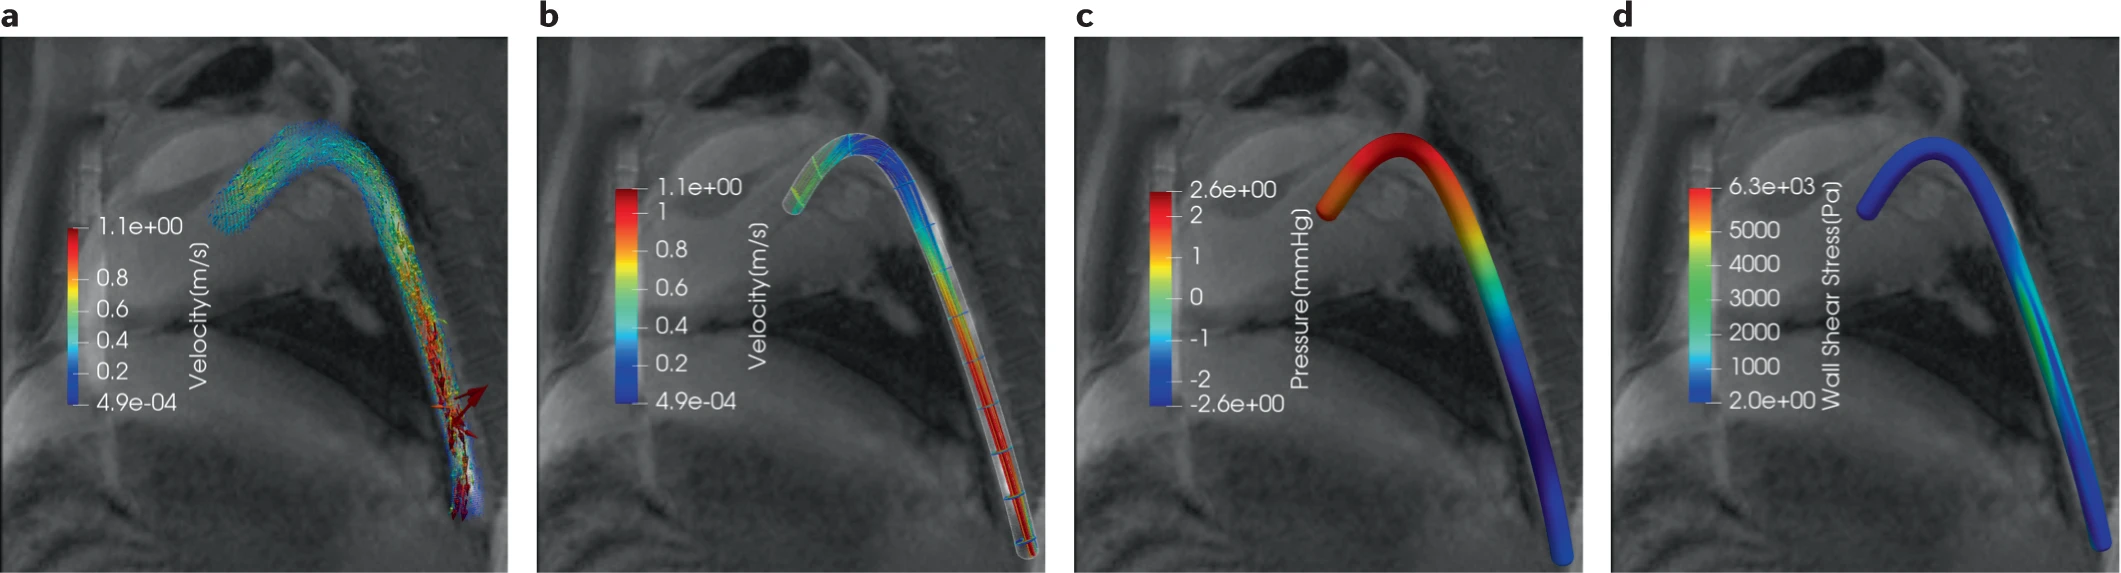

## Other examples

### Deep learning for fast spatially varying deconvolution

Deconvolution can be used to obtain sharp images or volumes from blurry or encoded measurements in imaging systems. 

Given knowledge of the system’s transfer function over the field of view, a reconstruction algorithm can be used to recover a clear image or volume.

In realistic systems, the transfer function varies laterally and axially across the field of view due to aberrations or design. Shift-varying deconvolution models can be used, but they are often slow and computationally intensive.

MultiWienerNet uses multiple differentiable Wiener filters paired with a convolutional neural network to incorporate spatial variance allows for fast 2D and 3D reconstructions.
Although, it does not conform to the traditional framework of PINNs, which explicitly integrate physical laws into the learning process, this method  effectively incorporates system-specific information about spatially varying PSFs outperforming existing data-driven deep-learning-based methods.

<img src="images/Lesson_09_deconv.jpg" width="1200">

**a** | Snapshot of in-vivo 4D-flow MRI measurements. **b–d** | A PINN reconstruction of the velocity field (panel b), pressure (panel c), arterial wall surface geometry and wall shear stresses (panel d).

### Interpretable biologically informed deep learning

The integration of biological knowledge into neural network architectures has emerged as a pivotal advancement in precision medicine, aiming to enhance both the interpretability and performance of predictive models. Traditional deep learning models, while powerful, often function as "black boxes," providing limited insight into the underlying biological mechanisms influencing disease outcomes. To address this challenge, researchers have developed Biologically Informed Neural Networks (BINNs), which embed biological entities and their interactions directly into the network structure. 

By aligning the architecture of neural networks with known biological processes, BINNs facilitate a more transparent understanding of how specific pathways and entities contribute to disease progression. This alignment not only enhances the interpretability of the models but also improves their predictive accuracy by ensuring that the learned representations are biologically plausible. In the context of precision medicine, such interpretability is crucial, as it enables clinicians to make informed decisions based on the model's insights into patient-specific factors.

The application of BINNs extends to various domains within precision medicine, including biomarker discovery and pathway analysis. By incorporating proteomic data and associated pathways into the neural network, BINNs can identify critical proteins and biological processes that differentiate between disease subphenotypes. For instance, in the study of septic acute kidney injury and COVID-19, BINNs have been employed to distinguish between subphenotypes based on plasma proteome profiles, leading to a deeper understanding of the molecular mechanisms underlying these conditions. 

Moreover, the interpretability of BINNs is further enhanced through feature attribution methods, which allow for the introspection of the network to identify which proteins and pathways are pivotal in distinguishing between subphenotypes. This capability is instrumental in developing targeted treatments and personalized therapeutic strategies, as it provides a clear map of the biological factors influencing disease outcomes.

In summary, the development of Biologically Informed Neural Networks represents a significant stride toward integrating domain-specific knowledge into deep learning models. By embedding biological information into the network architecture, BINNs offer a pathway to more interpretable and effective models in precision medicine, ultimately contributing to improved patient care and personalized treatment approaches. 

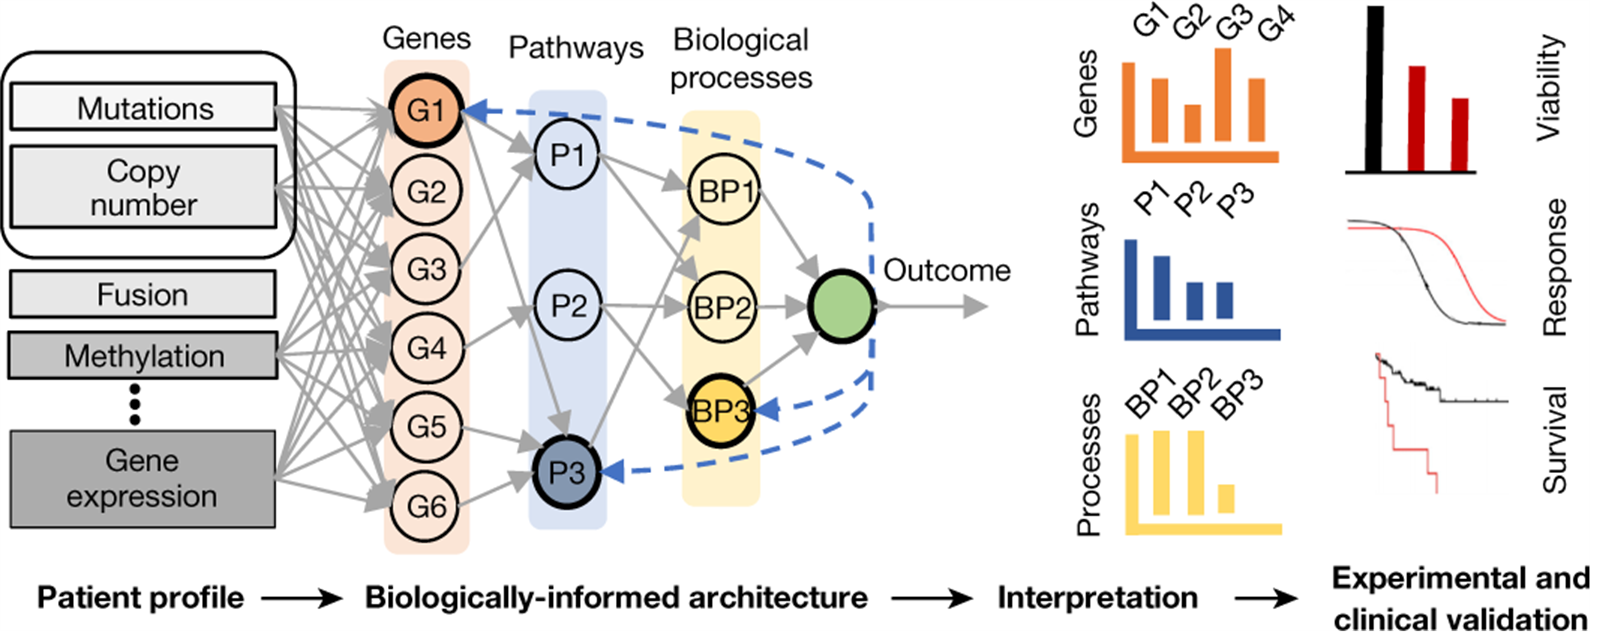

Visualization of the inner layers shows the estimated relative importance of different nodes in each layer for prostate cancer discovery.


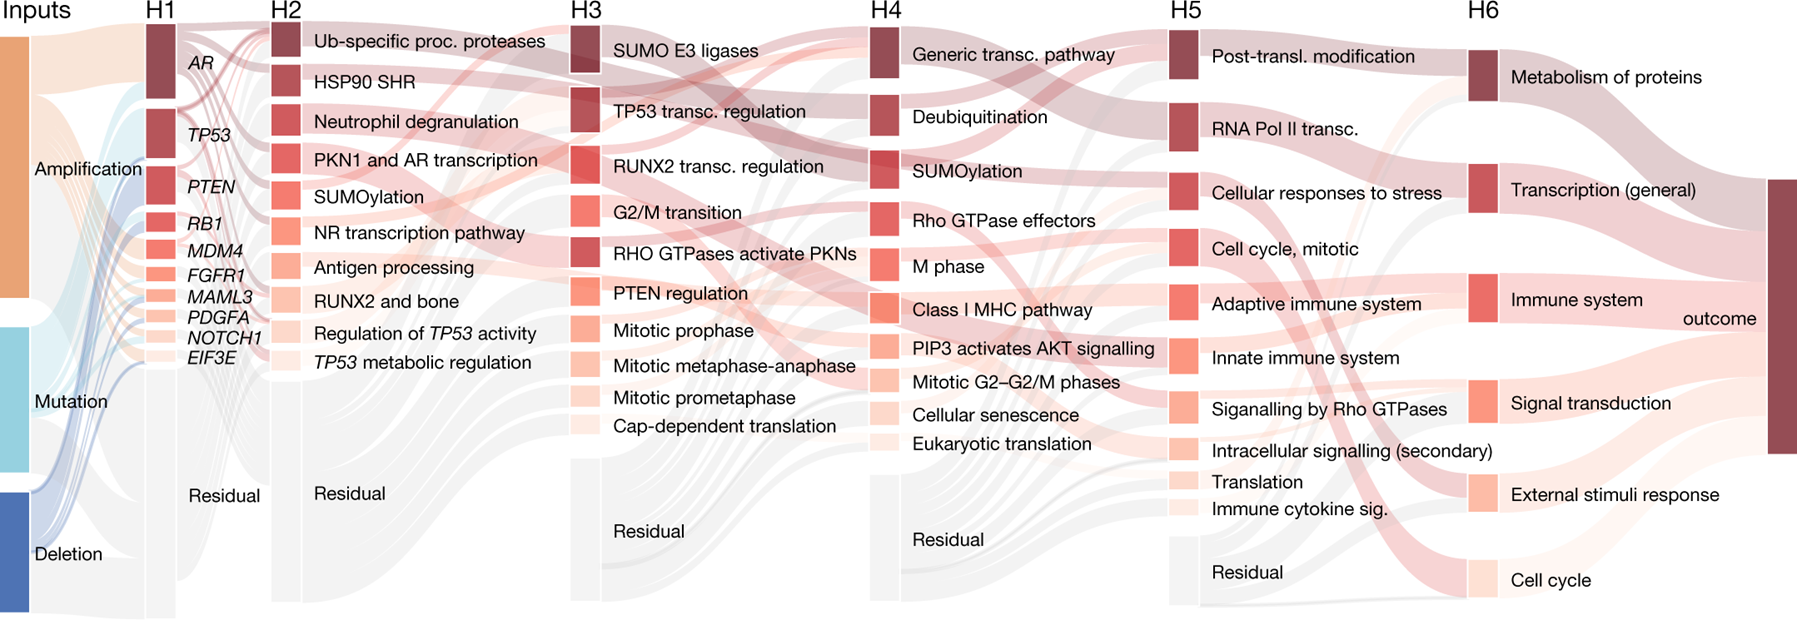


## Challenges and Future Directions

While PBDL offers significant advantages, several challenges remain:

- **Training Complexity:** Incorporating PDE constraints can lead to complex loss landscapes, making optimization challenging. Advanced techniques, such as adaptive loss weighting and adaptive sampling, have been proposed to address these issues. 

- **Scalability:** Applying PBDL to large-scale, high-dimensional problems requires efficient algorithms and computational resources. Research is ongoing to develop scalable methods that can handle real-world engineering applications.

- **Integration with Traditional Methods:** Combining PBDL with established numerical methods, such as finite element analysis, can enhance model accuracy and reliability. Hybrid approaches that leverage the strengths of both paradigms are an active area of research.

In conclusion, Physics-Based Deep Learning represents a promising paradigm that bridges the gap between data-driven models and physical principles. By embedding physical laws into machine learning frameworks, engineers can develop models that are both accurate and generalizable, paving the way for advancements in simulation, design, and control across various engineering disciplines. 